📊 Pemahaman Data
1. Jumlah baris (entri data): 725
2. Jumlah kolom: 16
3. Kolom penting: prodi, fakultas, stat_pegawai, ikatan_kerja, pangkat, dll.
4. Data kosong (missing values):
- rumpun_ilmu: 222 nilai kosong
- pangkat: 205 nilai kosong
- jabatan_akademik: 235 nilai kosong
- sertifikasi & tahun_sertifikasi: 411 nilai kosong
- Kolom lainnya lengkap

🔍 Unik Value dari Kolom Penting
- fakultas: FK, FT, FIK, FIKES, FH, FISIP, FEB
- ikatan_kerja: Dosen Tetap, Dosen Tidak Tetap, Dosen Tetap PKWT, Pengajar Non-Dosen
- pangkat: Rentang dari III/a (Penata Muda) hingga IV/e (Pembina Utama)

✅ Langkah Cleaning & Preprocessing
- Identifikasi missing values
- Penyesuaian nilai yang tidak konsisten (tahun_sertifikasi, sertifikasi)
- Pemetaan prodi ke fakultas untuk strukturisasi data

In [ ]:
import pandas as pd
from datetime import datetime

df = pd.read_csv("E:\Jupyter\Data Pegawai Kampus XYZ.csv")

<>:4: SyntaxWarning: invalid escape sequence '\J'
<>:4: SyntaxWarning: invalid escape sequence '\J'
C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_16220\3939812138.py:4: SyntaxWarning: invalid escape sequence '\J'
  df = pd.read_csv("E:\Jupyter\Data Pegawai Kampus XYZ.csv")


In [40]:
df.head()

,id_pegawai,jk,tgl_lahir,rumpun_ilmu,stat_aktif,stat_pegawai,ikatan_kerja,pendidikan,pangkat,jabatan_akademik,sertifikasi,tahun_sertifikasi,tgl_jabatan_akademik,jenj_prodi,prodi,fakultas
0,1,L,1972-02-10,NaN,Aktif,ASN JF Non Dosen,Dosen Tidak Tetap,Sp-1,NaN,NaN,NaN,NaN,NaN,Profesi,Pendidikan Profesi Dokter,FK
1,2,L,1985-03-27,RUMPUN ILMU TERAPAN,Aktif,NON ASN,Dosen Tetap Perjanjian Kerja Waktu Tertentu,S3,III/c - Penata,Lektor Kepala,Sertifikasi Dosen,2020.0,2023-06-01,S1,Teknik Mesin,FT
2,3,P,1990-01-09,RUMPUN ILMU FORMAL,Aktif,PNS,Dosen Tetap,S2,III/b - Penata Muda Tk. I,Asisten Ahli,NaN,NaN,2024-05-01,S1,Sistem Informasi,FIK
3,4,P,1987-01-12,RUMPUN ILMU FORMAL,Aktif,PNS,Dosen Tetap,S2,III/c - Penata,Lektor,Sertifikasi Dosen,2018.0,2023-07-03,S1,Informatika,FIK
4,5,P,1967-11-28,NaN,Aktif,ASN JF Non Dosen,Dosen Tidak Tetap,Sp-1,NaN,NaN,NaN,NaN,NaN,Profesi,Pendidikan Profesi Dokter,FK


In [41]:
df.isnull().sum()

id_pegawai                0
jk                        0
tgl_lahir                 0
rumpun_ilmu             222
stat_aktif                0
stat_pegawai              0
ikatan_kerja              0
pendidikan                0
pangkat                 205
jabatan_akademik        235
sertifikasi             411
tahun_sertifikasi       411
tgl_jabatan_akademik    235
jenj_prodi                0
prodi                     0
fakultas                  0
dtype: int64

In [42]:
df['tgl_lahir'] = pd.to_datetime(df['tgl_lahir'], errors='coerce')

In [43]:
df['umur'] = (datetime.now() - df['tgl_lahir']).dt.days // 365

In [44]:
pd.crosstab(df['stat_pegawai'], df['ikatan_kerja'])

ikatan_kerja,Dosen Tetap,Dosen Tetap Perjanjian Kerja Waktu Tertentu,Dosen Tidak Tetap,Pengajar nondosen
stat_pegawai,,,,
ASN JF Non Dosen,0,0,43,0
CPNS,80,0,0,0
NON ASN,0,136,93,6
PNS,233,0,0,0
POLRI,0,0,6,0
PPPK,0,84,0,0
TNI,0,0,44,0


In [45]:
pd.crosstab(df['stat_aktif'], df['stat_pegawai'])

stat_pegawai,ASN JF Non Dosen,CPNS,NON ASN,PNS,POLRI,PPPK,TNI
stat_aktif,,,,,,,
Aktif,43,80,217,206,6,81,44
CUTI,0,0,1,0,0,0,0
TUGAS BELAJAR,0,0,17,27,0,3,0


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# Ubah tgl_lahir ke datetime dan buat kolom usia
df['tgl_lahir'] = pd.to_datetime(df['tgl_lahir'], errors='coerce')
df['usia'] = pd.Timestamp('now').year - df['tgl_lahir'].dt.year

In [48]:
# Normalisasi kolom sertifikasi menjadi biner
df['sertifikasi_biner'] = df['sertifikasi'].apply(lambda x: 1 if str(x).strip().lower() == 'sertifikasi dosen' else 0)

In [49]:
# Atur ukuran default
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_16220\270479781.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='fakultas', order=df['fakultas'].value_counts().index, palette='Set2')


Text(0, 0.5, 'Fakultas')

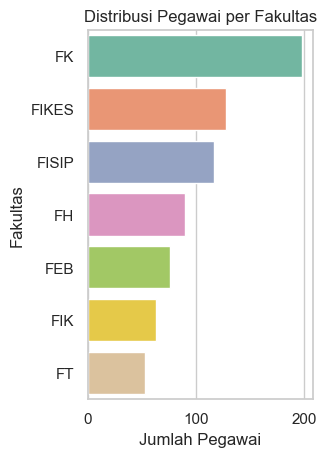

In [50]:
# Plot 1: Distribusi pegawai per fakultas
plt.subplot(1, 2, 1)
sns.countplot(data=df, y='fakultas', order=df['fakultas'].value_counts().index, palette='Set2')
plt.title('Distribusi Pegawai per Fakultas')
plt.xlabel('Jumlah Pegawai')
plt.ylabel('Fakultas')

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_16220\1294590479.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sertifikasi_biner', palette='Set1')


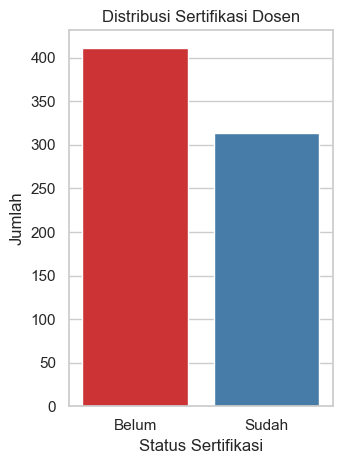

In [51]:
# Plot 2: Distribusi status sertifikasi
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='sertifikasi_biner', palette='Set1')
plt.xticks([0, 1], ['Belum', 'Sudah'])
plt.title('Distribusi Sertifikasi Dosen')
plt.xlabel('Status Sertifikasi')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_16220\168119753.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sertifikasi_biner', y='usia', palette='coolwarm')


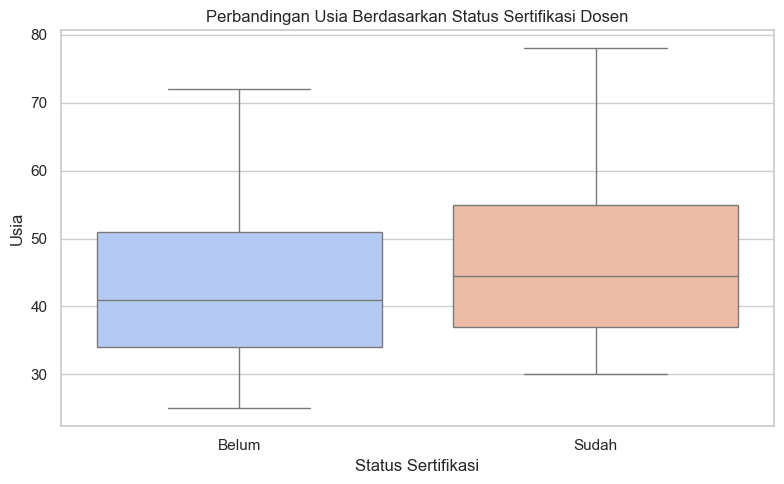

In [57]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='sertifikasi_biner', y='usia', palette='coolwarm')
plt.xticks([0, 1], ['Belum', 'Sudah'])
plt.title('Perbandingan Usia Berdasarkan Status Sertifikasi Dosen')
plt.xlabel('Status Sertifikasi')
plt.ylabel('Usia')
plt.tight_layout()
plt.show()

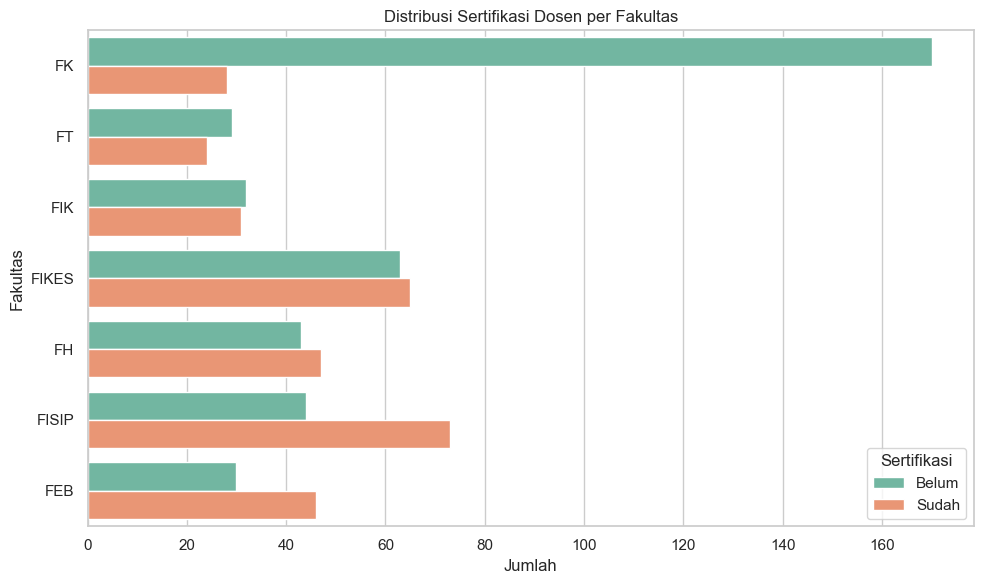

In [53]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='fakultas', hue='sertifikasi_biner', palette='Set2')
plt.title('Distribusi Sertifikasi Dosen per Fakultas')
plt.xlabel('Jumlah')
plt.ylabel('Fakultas')
plt.legend(title='Sertifikasi', labels=['Belum', 'Sudah'])
plt.tight_layout()
plt.show()


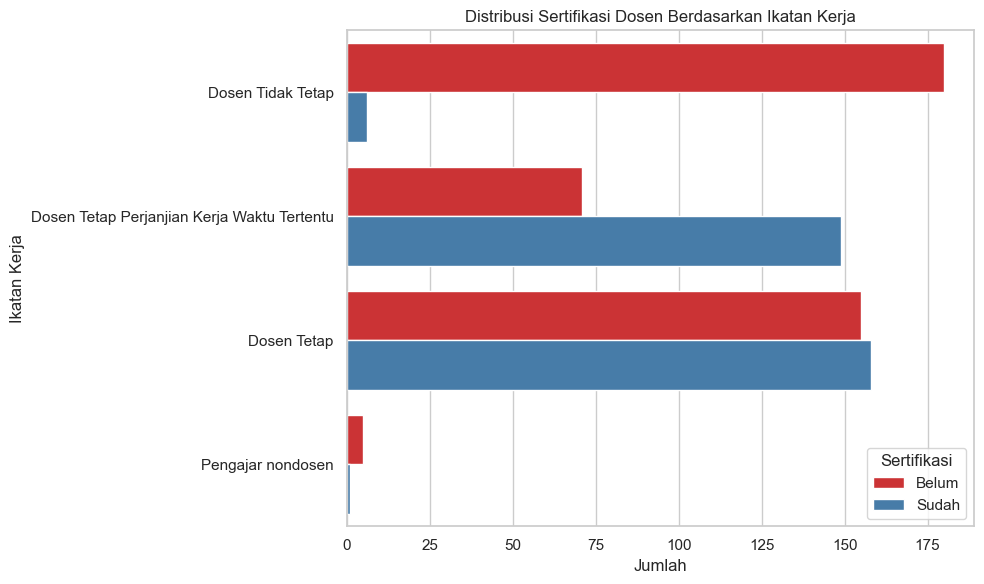

In [54]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='ikatan_kerja', hue='sertifikasi_biner', palette='Set1')
plt.title('Distribusi Sertifikasi Dosen Berdasarkan Ikatan Kerja')
plt.xlabel('Jumlah')
plt.ylabel('Ikatan Kerja')
plt.legend(title='Sertifikasi', labels=['Belum', 'Sudah'])
plt.tight_layout()
plt.show()


In [58]:
class DemographicAnalyzer:
    def __init__(self, df):
        self.df = df
        # Pastikan kolom umur sudah dihitung
        if 'umur' not in self.df.columns:
            self.df['tgl_lahir'] = pd.to_datetime(self.df['tgl_lahir'], errors='coerce')
            self.df['umur'] = (datetime.now() - self.df['tgl_lahir']).dt.days // 365

    def demographic_analysis(self):
        """
        Analisis demografis
        """
        print("="*60)
        print("ANALISIS DEMOGRAFIS")
        print("="*60)
        
        plt.figure(figsize=(20, 15))
        
        # 1. Distribusi Jenis Kelamin
        plt.subplot(3, 4, 1)
        gender_counts = self.df['jk'].value_counts()
        plt.pie(gender_counts.values, labels=['Laki-laki' if x=='L' else 'Perempuan' for x in gender_counts.index], 
                autopct='%1.1f%%', startangle=90)
        plt.title('Distribusi Jenis Kelamin')
        
        # 2. Distribusi Umur
        plt.subplot(3, 4, 2)
        plt.hist(self.df['umur'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
        plt.title('Distribusi Umur')
        plt.xlabel('Umur')
        plt.ylabel('Frekuensi')
        
        # 3. Distribusi Pendidikan
        plt.subplot(3, 4, 3)
        edu_counts = self.df['pendidikan'].value_counts()
        plt.bar(edu_counts.index, edu_counts.values, color='lightgreen', alpha=0.8)
        plt.title('Distribusi Pendidikan')
        plt.ylabel('Jumlah')
        
        # 4. Distribusi Fakultas
        plt.subplot(3, 4, 4)
        fac_counts = self.df['fakultas'].value_counts()
        plt.barh(fac_counts.index, fac_counts.values, color='coral')
        plt.title('Distribusi Fakultas')
        plt.xlabel('Jumlah')
        
        # 5. Distribusi Ikatan Kerja
        plt.subplot(3, 4, 5)
        work_counts = self.df['ikatan_kerja'].value_counts()
        plt.pie(work_counts.values, labels=work_counts.index, autopct='%1.1f%%')
        plt.title('Distribusi Ikatan Kerja')
        
        # 6. Status Aktif
        plt.subplot(3, 4, 6)
        status_counts = self.df['stat_aktif'].value_counts()
        plt.bar(status_counts.index, status_counts.values, color='gold', alpha=0.8)
        plt.title('Status Aktif Pegawai')
        plt.ylabel('Jumlah')
        
        # 7. Distribusi Jabatan Akademik (non-null)
        plt.subplot(3, 4, 7)
        jabatan_counts = self.df['jabatan_akademik'].value_counts()
        plt.barh(jabatan_counts.index, jabatan_counts.values, color='purple', alpha=0.7)
        plt.title('Distribusi Jabatan Akademik')
        plt.xlabel('Jumlah')
        
        # 8. Kelompok Umur
        plt.subplot(3, 4, 8)
        age_groups = pd.cut(self.df['umur'], bins=[0, 30, 40, 50, 60, 100], 
                           labels=['<30', '30-39', '40-49', '50-59', '60+'])
        age_group_counts = age_groups.value_counts()
        plt.bar(age_group_counts.index, age_group_counts.values, color='orange', alpha=0.8)
        plt.title('Distribusi Kelompok Umur')
        plt.ylabel('Jumlah')
        plt.xticks(rotation=45)
        
        # 9. Sertifikasi
        plt.subplot(3, 4, 9)
        cert_counts = self.df['sertifikasi'].value_counts()
        plt.pie(cert_counts.values, labels=cert_counts.index, autopct='%1.1f%%')
        plt.title('Status Sertifikasi')
        
        # 10. Trend Tahun Sertifikasi
        plt.subplot(3, 4, 10)
        cert_years = self.df['tahun_sertifikasi'].dropna()
        if len(cert_years) > 0:
            plt.hist(cert_years, bins=15, alpha=0.7, color='lightblue', edgecolor='black')
            plt.title('Trend Tahun Sertifikasi')
            plt.xlabel('Tahun')
            plt.ylabel('Jumlah')
        
        # 11. Distribusi Pangkat
        plt.subplot(3, 4, 11)
        pangkat_counts = self.df['pangkat'].value_counts()
        plt.barh(pangkat_counts.index, pangkat_counts.values, color='green', alpha=0.7)
        plt.title('Distribusi Pangkat')
        plt.xlabel('Jumlah')
        
        # 12. Cross-tabulation: Pendidikan vs Jabatan Akademik
        plt.subplot(3, 4, 12)
        crosstab = pd.crosstab(self.df['pendidikan'], self.df['jabatan_akademik'])
        sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
        plt.title('Pendidikan vs Jabatan Akademik')
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()


ANALISIS DEMOGRAFIS


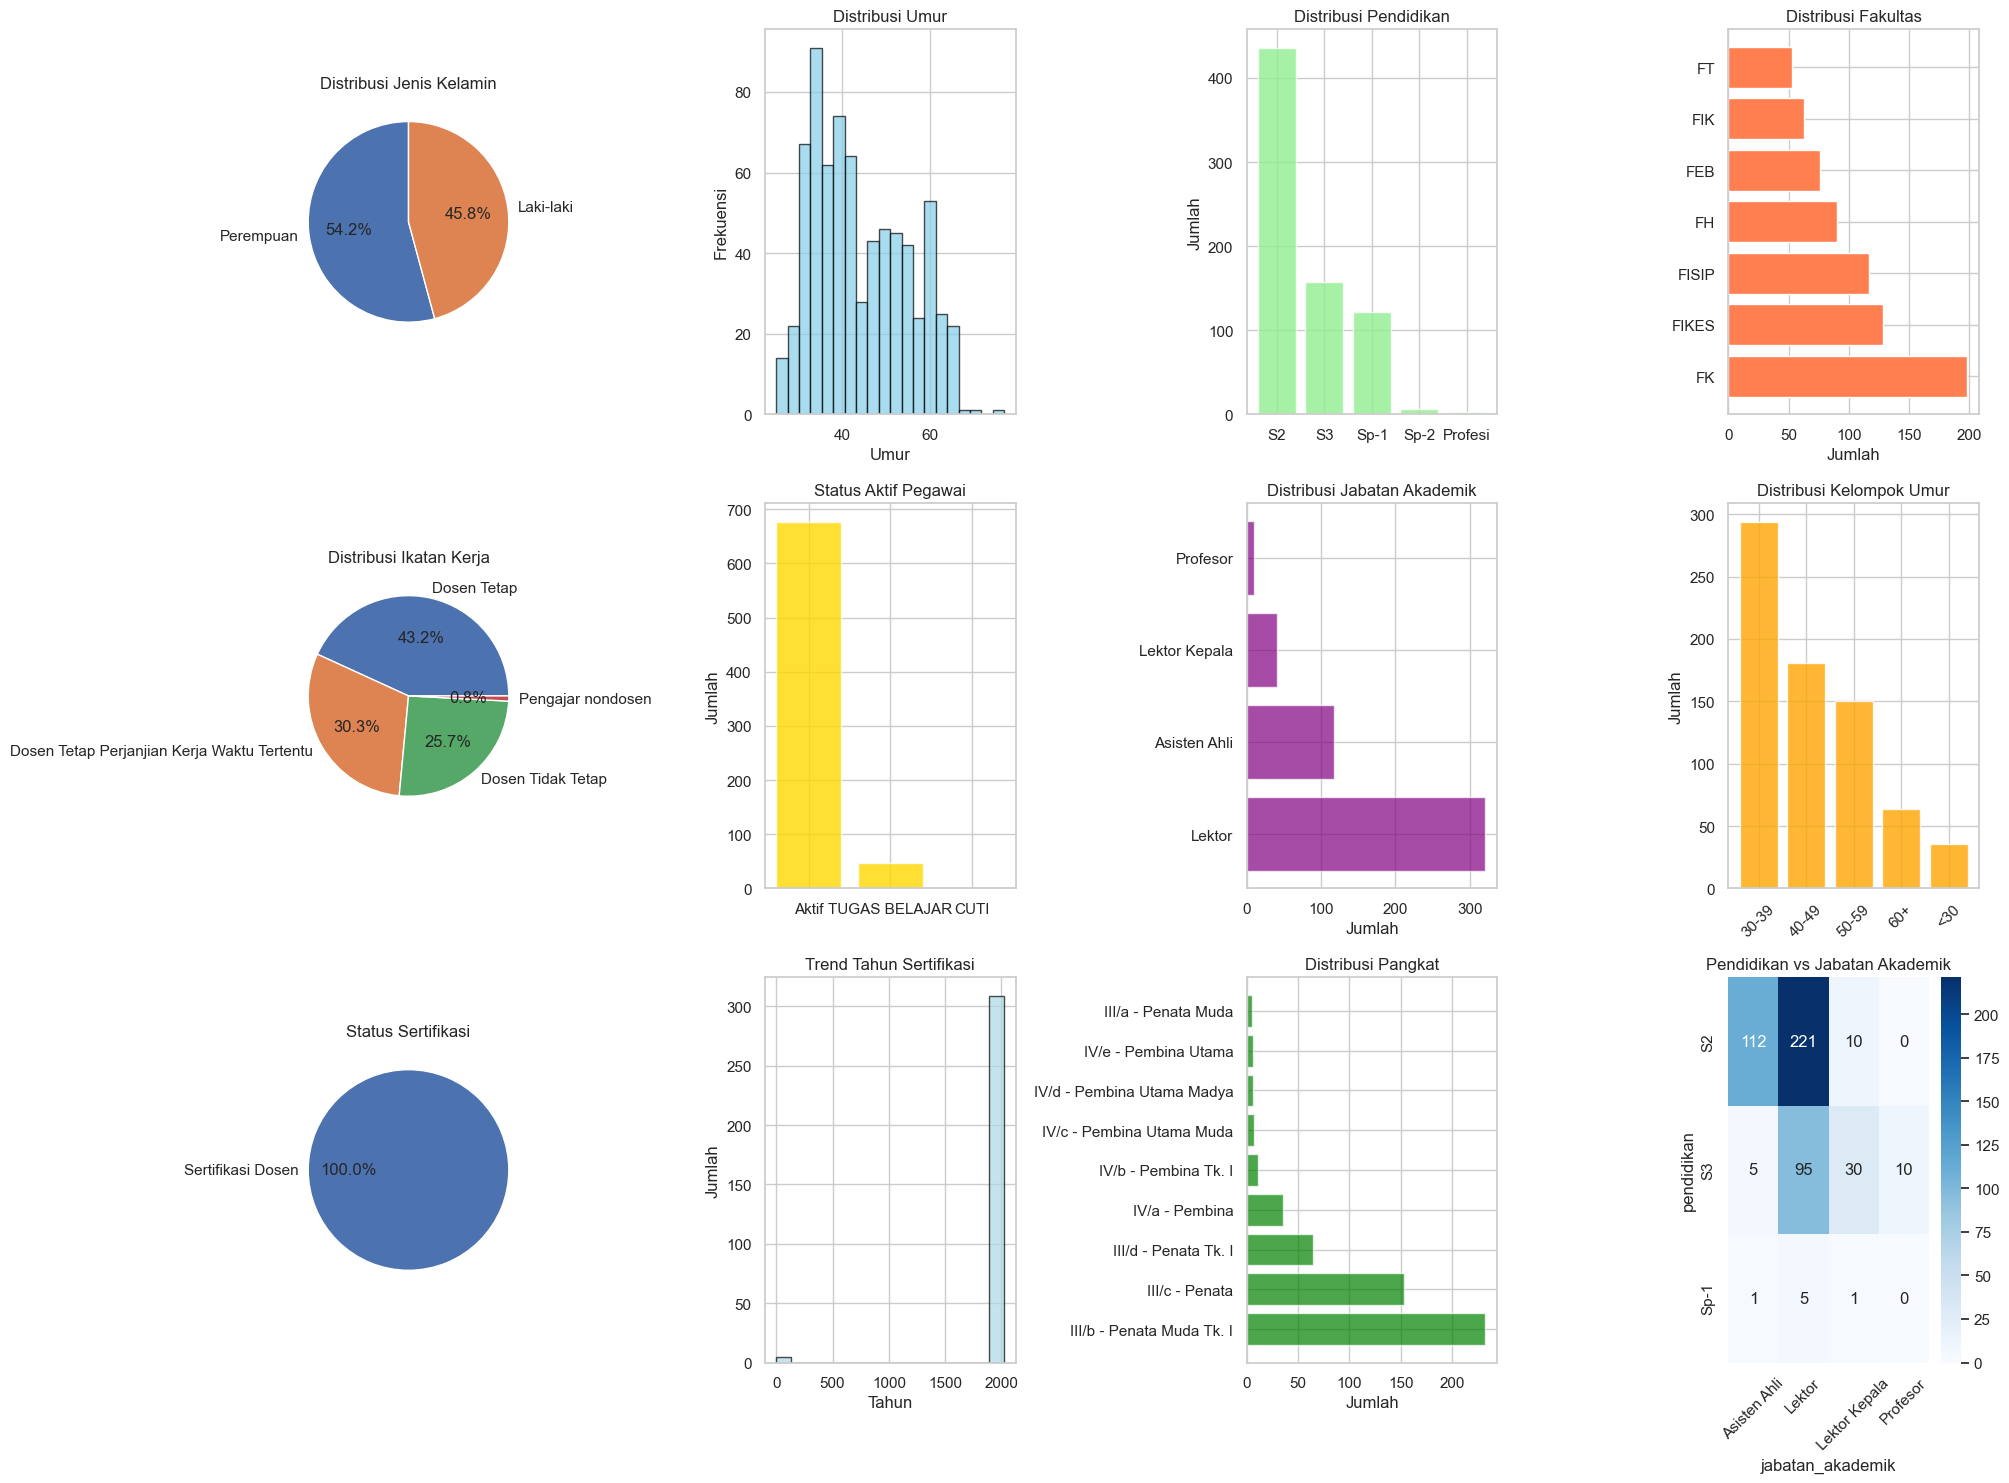

In [59]:
# Membuat objek analyzer
analyzer = DemographicAnalyzer(df)

# Menjalankan analisis
analyzer.demographic_analysis()
